In [1]:
MAKE_BOOK_FIGURES=Trueimport numpy as npimport scipy.stats as stimport matplotlib as mplimport matplotlib.pyplot as plt%matplotlib inlineimport matplotlib_inlinematplotlib_inline.backend_inline.set_matplotlib_formats('svg')import seaborn as snssns.set_context("paper")sns.set_style("ticks")def set_book_style():    plt.style.use('seaborn-v0_8-white')     sns.set_style("ticks")    sns.set_palette("deep")    mpl.rcParams.update({        # Font settings        'font.family': 'serif',  # For academic publishing        'font.size': 8,  # As requested, 10pt font        'axes.labelsize': 8,        'axes.titlesize': 8,        'xtick.labelsize': 7,  # Slightly smaller for better readability        'ytick.labelsize': 7,        'legend.fontsize': 7,                # Line and marker settings for consistency        'axes.linewidth': 0.5,        'grid.linewidth': 0.5,        'lines.linewidth': 1.0,        'lines.markersize': 4,                # Layout to prevent clipped labels        'figure.constrained_layout.use': True,                # Default DPI (will override when saving)        'figure.dpi': 600,        'savefig.dpi': 600,                # Despine - remove top and right spines        'axes.spines.top': False,        'axes.spines.right': False,                # Remove legend frame        'legend.frameon': False,                # Additional trim settings        'figure.autolayout': True,  # Alternative to constrained_layout        'savefig.bbox': 'tight',    # Trim when saving        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off    })def set_notebook_style():    plt.style.use('seaborn-v0_8-white')    sns.set_style("ticks")    sns.set_palette("deep")    mpl.rcParams.update({        # Font settings - using default sizes        'font.family': 'serif',        'axes.labelsize': 10,        'axes.titlesize': 10,        'xtick.labelsize': 9,        'ytick.labelsize': 9,        'legend.fontsize': 9,                # Line and marker settings        'axes.linewidth': 0.5,        'grid.linewidth': 0.5,        'lines.linewidth': 1.0,        'lines.markersize': 4,                # Layout settings        'figure.constrained_layout.use': True,                # Remove only top and right spines        'axes.spines.top': False,        'axes.spines.right': False,                # Remove legend frame        'legend.frameon': False,                # Additional settings        'figure.autolayout': True,        'savefig.bbox': 'tight',        'savefig.pad_inches': 0.1    })def save_for_book(fig, filename, is_vector=True, **kwargs):    """    Save a figure with book-optimized settings.        Parameters:    -----------    fig : matplotlib figure        The figure to save    filename : str        Filename without extension    is_vector : bool        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.    **kwargs : dict        Additional kwargs to pass to savefig    """        # Set appropriate DPI and format based on figure type    if is_vector:        dpi = 1000        ext = '.pdf'    else:        dpi = 600        ext = '.tif'        # Save the figure with book settings    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)def make_full_width_fig():    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)def make_half_width_fig():    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)if MAKE_BOOK_FIGURES:    set_book_style()else:    set_notebook_style()make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

(predictive-quantiles)=
# Estimating Predictive Quantiles

Recall the definition of the $q$-quantile of a normal random variable we gave in [Lecture 4](quantiles-normal).
Recall also that you can say $100q$-th percentile instead of $q$-quantile.
The exact definition holds for any random variable.
Let's repeat it here for convenience.
Take $X$ as a random variable and $Y=g(X)$ as a function of $X$.
The $q$-quantile of $Y$ is defined to be the number $\mu_q$ for which:

$$
F(\mu_q) = p(Y \le \mu_q) = q,
$$

where $F(y)$ was defined to be the CDF of $Y$.
For example, the 0.50-quantile (also known as the median) is the value $\mu_{0.50}$ for which:

$$
F(\mu_{0.50}) = p(Y \le \mu_{0.50}) = 0.5.
$$

So, to find the quantiles, we need to 1) know the CDF of $Y$ and 2) solve a root-finding problem with $\mu_q$ as the unknown.
We have already seen how one can estimate the CDF from samples, so we would only have to worry about the root-finding problem.
It is not difficult to do, but since it is already implemented in ``numpy`` we will not bother with it.
So, here is how you can find the empirical quantiles of $Y$ for a specific example where $g(x)$ is given by Example 3.4 of {cite}`robert_monte_2004`:

$$
g(x) = \left(\cos(50x) + \sin(20x)\right)^2.
$$

and $X\sim U([0,1])$.

As usual, define the function and take some samples:

In [2]:
import numpy as np

# define the function here:
g = lambda x: (np.cos(50 * x) + np.sin(20 * x)) ** 2

# Maximum number of samples to take
max_n = 10000 
# Generate samples from X
x_samples = np.random.rand(max_n)
# Get the corresponding Y's
y_samples = g(x_samples)

Now let's, find the 0.5-quantile:

In [3]:
mu_50 = np.quantile(y_samples, 0.5)
print(f"mu_50 = {mu_50:.2f}")

mu_50 = 0.60


In [4]:
# Let's find the 0.025-quantile
mu_025 = np.quantile(y_samples, 0.025)
print(f"mu_025 = {mu_025:.2f}")
# and the 0.975-quantile
mu_975 = np.quantile(y_samples, 0.975)
print(f"mu_975 = {mu_975:.2f}")

mu_025 = 0.00
mu_975 = 3.68


Let's now mark these quantiles on the histogram of Y:

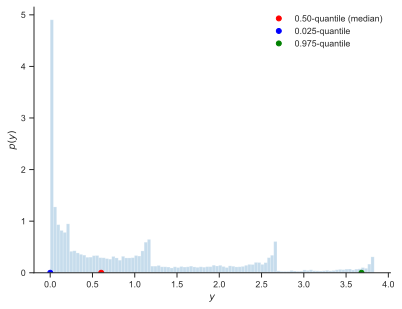

In [6]:
fig, ax = plt.subplots()
ax.hist(
    y_samples,
    density=True,
    alpha=0.25,
    bins=100
)
ax.plot(
    [mu_50],
    [0],
    "ro",
    markersize=5, 
    label="0.50-quantile (median)"
)
ax.plot(
    [mu_025],
    [0],
    "bo",
    markersize=5,
    label="0.025-quantile"
)
ax.plot(
    [mu_975],
    [0],
    "go",
    markersize=5,
    label="0.975-quantile"
)
ax.set_xlabel(r"$y$")
ax.set_ylabel(r"$p(y)$")
plt.legend(loc="best", frameon=False)
sns.despine(trim=False);

Very often, the predictive intervals are summarized using box plots:

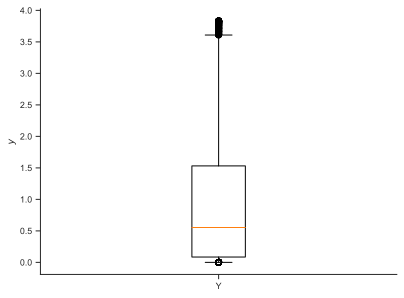

In [6]:
fig, ax = plt.subplots()
# Here the input is percentiles not quantiles though
ax.boxplot(y_samples, whis=[2.5, 97.5], labels=["Y"]);
ax.set_ylabel(r"$y$")
sns.despine(trim=False);

In the plot above, the $y$-axis indicates possible values, the median is shown as an orange line, the box encapsulates 50\% of the probability around the median, and the whiskers are extreme quantiles (here selected to be the 0.025 and 0.975 quantiles). Finally, the plot also shows the samples that fall outside the extreme quantiles.

An alternative to the box plot is the violin plot, which shows the distribution of the data (essentially a smoothed histogram).
The violin plot is shown below.

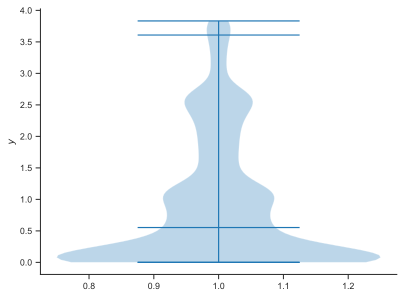

In [12]:
# Write code that makes the violin plot using y_samples
fig, ax = plt.subplots()
ax.violinplot(y_samples, quantiles=[0.025, 0.5, 0.975])
ax.set_ylabel(r"$y$")
sns.despine(trim=False);

An alternative to

## Questions
+ How much probability do you have on the left of $\mu_{0.50}$, i.e., what is $p(Y \le \mu_{0.50})$?
+ How much probability do you have on the right of $\mu_{0.50}$, i.e., what is $p(Y \le \mu_{0.50})$?
+ How much probability do you have on the left of $\mu_{0.025}$?
+ How much probability do you have on the right of $\mu_{0.975}$?
+ How much probability do you have between $\mu_{2.5}$ and $\mu_{0.975}$?
+ The predictive quantiles are a very nice way to summarize the probability density of a random variable with a few numbers.
For example, you can think of $\mu_{0.50}$ as a central value of $Y$.
Often, we call the interval $[\mu_{0.025}, \mu_{0.975}]$ the 95\% *predictive interval*.
You can interpret this interval as $Y \in [\mu_{0.025}, \mu_{0.975}]$ with 95\% probability. Find a $99$\% predictive interval for the $Y$ of the example above.